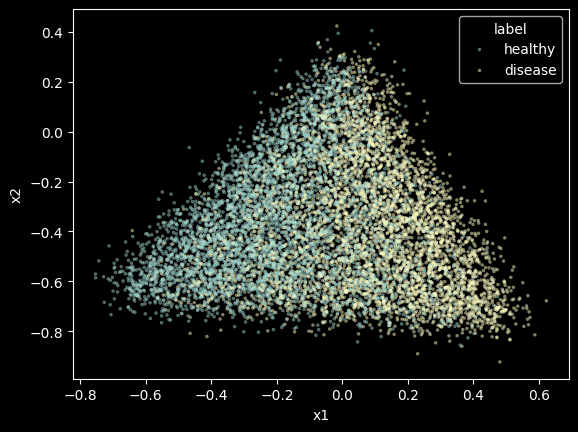

In [42]:
import sys

sys.path.append("..")
# this is what you need for python script
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from partipy.generate_test_data import simulate

N_SAMPLES = 10_000
N_ARCHETYPES = 3
N_DIMENSIONS = 2

X, A, Z = simulate(n_samples=N_SAMPLES,
                   n_archetypes=N_ARCHETYPES,
                   n_dimensions=N_DIMENSIONS,
                   noise_std=0.05,
                   seed=111)

condition_probs = A[:, 0] / A[:, [0, 2]].sum(axis=1)
condition_label = np.array([np.random.choice(["healthy", "disease"], size=1, p=[condition_probs[n], 1-condition_probs[n]])
                            for n in range(A.shape[0])]).flatten()

plt.style.use("dark_background")
sns.scatterplot(data=pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "label": condition_label}),
                x="x1", y="x2", hue="label", s=5, alpha=0.5)
plt.show()

In [31]:
pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "label": condition_label})

,x1,x2,label
0,0.692556,0.156283,healthy
1,-0.025987,0.245369,healthy
2,0.055449,0.147564,healthy
3,-0.237945,0.537107,disease
4,-0.146750,0.433832,disease
...,...,...,...
9995,0.364264,0.273729,disease
9996,-0.436529,0.883007,disease
9997,0.503956,-0.052906,healthy
9998,-0.021308,0.598368,disease


In [17]:
?np.random.choice

Signature: np.random.choice(a, size=None, replace=True, p=None)
Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the `~numpy.random.Generator.choice`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

.. warning::
    This function uses the C-long dtype, which is 32bit on windows
    and otherwise 64bit on 64bit platforms (and 32bit on 32bit ones).
    Since NumPy 2.0, NumPy's default integer is 32bit on 32bit platforms
    and 64bit on 64bit platforms.


Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
